# Individual samples inspection L1 AA vs L1 autoFMN

In [1]:
# in colab check 
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -rf code
    !git clone https://github.com/michal-stary/adversarial-ml-comparison.git code
    %cd /content/code/src

In [2]:
from logging_ import Logger
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
logger = Logger(logs_dir="sample_logs_finaltest")

In [4]:
logger.load_all()

# ensemble FMN2

In [5]:
from scores import SCORES

norm = "L1"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    if "Xiao" in model_name:
        continue
    run_ids = list(logger.where(norm=norm, model=model_name, attack="fmn2").keys())
    
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-autofmn-model-{model_name}-steps-1001", run_ids)    

# ensemble AA

In [6]:
from scores import SCORES

norm = "L1"
## add ensemble for L1:
for model_name in SCORES[norm][0]:
    run_ids = list(logger.where(norm=norm, model=model_name, attack="aa").keys())
    
    logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-allaa-model-{model_name}-steps-1001", run_ids)    

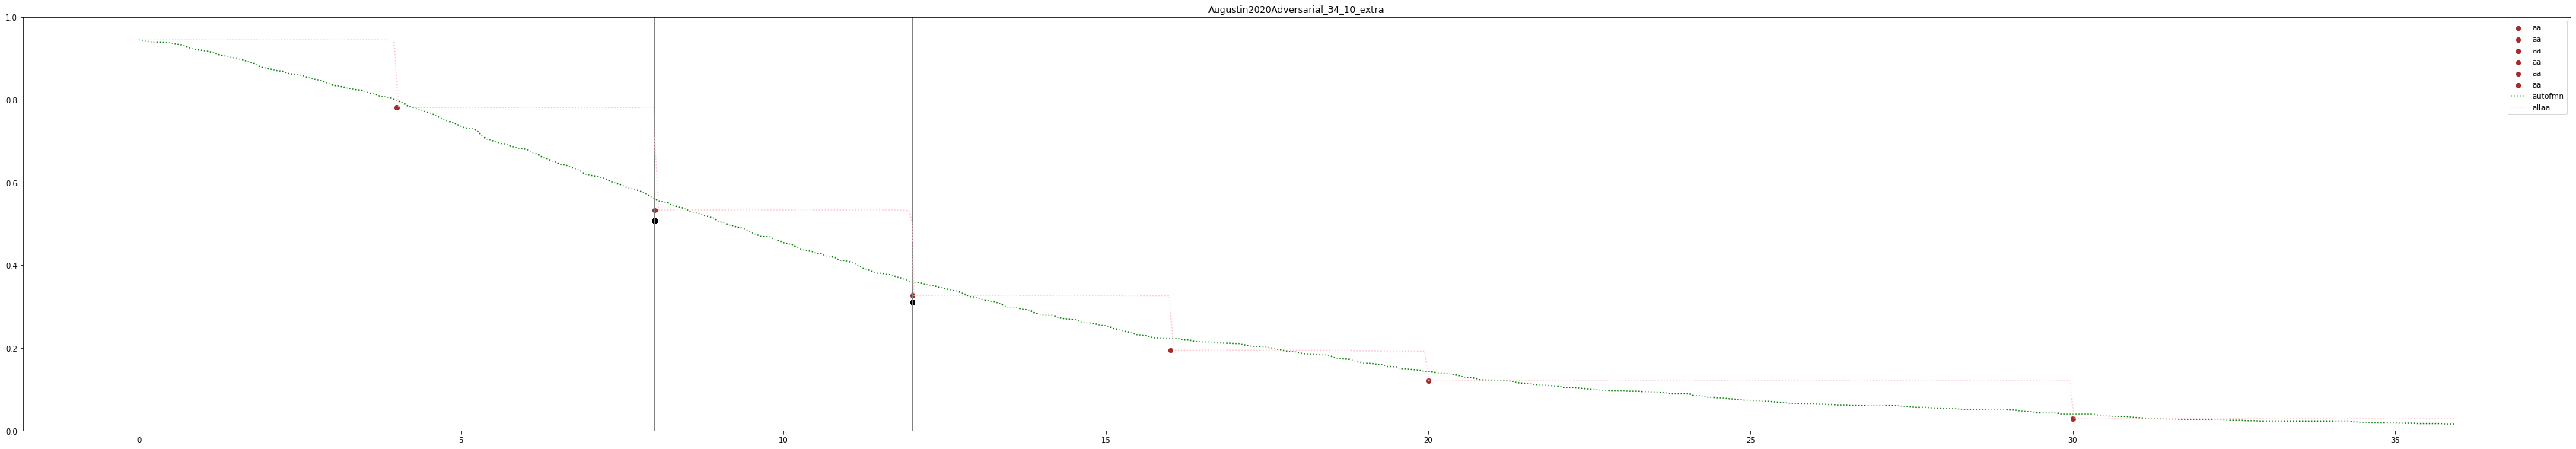

In [7]:
logger.plot_SE_grid(where_settings={"fmn_init":"X"}, figsize=(60,10))

In [8]:
logger.where(fmn_init="X").keys()

dict_keys(['dataset-CIFAR10-norm-L1-attack-aa-model-Augustin2020Adversarial_34_10_extra-eps-20-loss_f-DL', 'dataset-CIFAR10-norm-L1-attack-aa-model-Augustin2020Adversarial_34_10_extra-eps-8-loss_f-DL', 'dataset-CIFAR10-norm-L1-attack-aa-model-Augustin2020Adversarial_34_10_extra-eps-4-loss_f-DL', 'dataset-CIFAR10-norm-L1-attack-aa-model-Augustin2020Adversarial_34_10_extra-eps-16-loss_f-DL', 'dataset-CIFAR10-norm-L1-attack-aa-model-Augustin2020Adversarial_34_10_extra-eps-30-loss_f-DL', 'dataset-CIFAR10-norm-L1-attack-aa-model-Augustin2020Adversarial_34_10_extra-eps-12-loss_f-DL', 'dataset-CIFAR10-norm-L1-attack-autofmn-model-Augustin2020Adversarial_34_10_extra-steps-1001', 'dataset-CIFAR10-norm-L1-attack-allaa-model-Augustin2020Adversarial_34_10_extra-steps-1001'])

# explore selected

In [9]:
dic_fmn = logger.where(fmn_init="X", model="Augustin2020Adversarial_34_10_extra", attack="autofmn")
key_fmn = list(dic_fmn.keys())[0]
None

In [10]:
dic_aa = logger.where(fmn_init="X", model="Augustin2020Adversarial_34_10_extra", attack="allaa")
key_aa = list(dic_aa.keys())[0]


In [11]:
from utils.metrics import min_norms, min_norms_pred
fnorms = min_norms(dic_fmn[key_fmn]["norm_progress"], dic_fmn[key_fmn]["acc_progress"])

In [12]:
mask = (fnorms > dic_aa[key_aa]["norm_progress"][-1]) & (~ np.isclose(dic_aa[key_aa]["norm_progress"][-1], 0))


In [13]:
from utils.data_utils import create_loaders
n_samples = len(dic_fmn[key_fmn]["results"])
data_loader = create_loaders("data", task_config="CIFAR10",
                                     batch_size=n_samples,
                                     transform=None,
                                     random_state=0,
                                     n_workers=0,
                                    n_samples=n_samples)
clean, clean_y = list(next(iter(data_loader)))

Files already downloaded and verified


In [14]:
sorted_l = list(sorted(mask.nonzero()[0],key=lambda x: fnorms[x]))


In [15]:
print(sum([dic_fmn[key_fmn]['class'][l] == dic_aa[key_aa]['class'][l] for l in sorted_l]), len(sorted_l))

93 150


In [17]:
classes = ["airplane","automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

FMN norm: 4.015731334686279
AA norm:  4.0


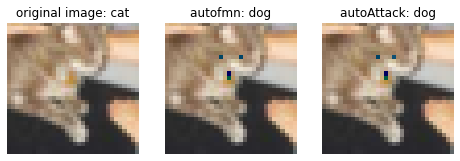

-----------------------------------------------------
FMN norm: 4.035722255706787
AA norm:  3.9


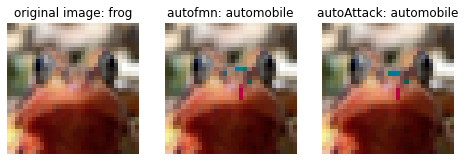

-----------------------------------------------------
FMN norm: 4.0698699951171875
AA norm:  4.0


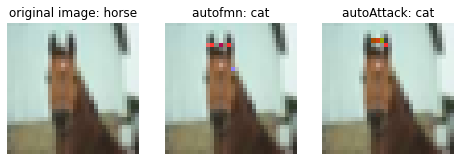

-----------------------------------------------------
FMN norm: 4.0799689292907715
AA norm:  4.0


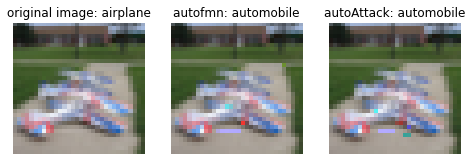

-----------------------------------------------------
FMN norm: 4.125464916229248
AA norm:  4.0


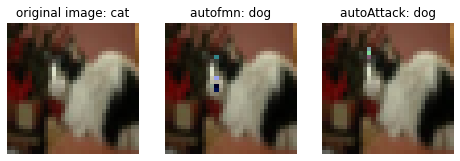

-----------------------------------------------------
FMN norm: 4.174753189086914
AA norm:  4.0


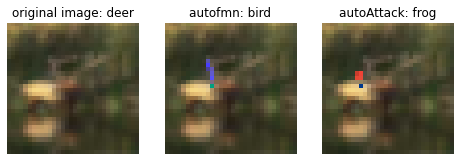

-----------------------------------------------------
FMN norm: 4.179909706115723
AA norm:  4.0


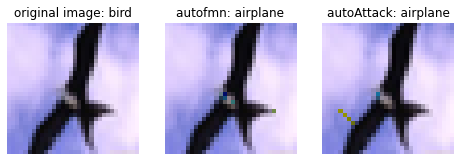

-----------------------------------------------------
FMN norm: 4.241477966308594
AA norm:  4.0


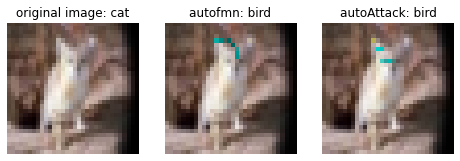

-----------------------------------------------------
FMN norm: 4.272100448608398
AA norm:  4.0


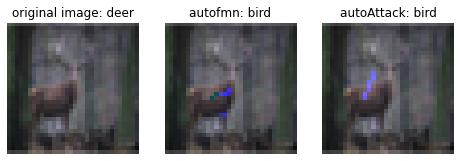

-----------------------------------------------------
FMN norm: 4.291225910186768
AA norm:  4.0


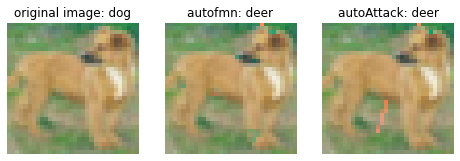

-----------------------------------------------------
FMN norm: 4.335359573364258
AA norm:  4.0


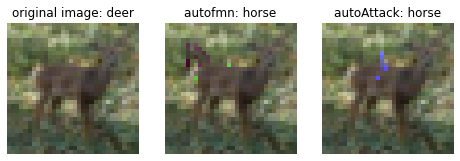

-----------------------------------------------------
FMN norm: 4.351993083953857
AA norm:  4.0


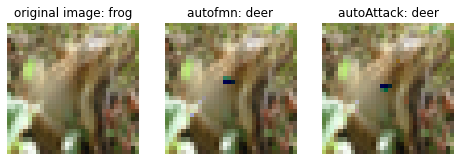

-----------------------------------------------------
FMN norm: 4.357542037963867
AA norm:  4.0


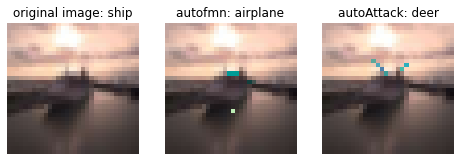

-----------------------------------------------------
FMN norm: 4.474081516265869
AA norm:  4.0


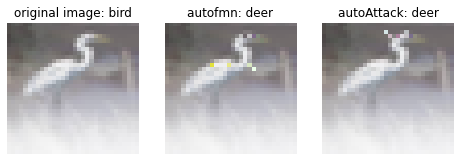

-----------------------------------------------------
FMN norm: 4.55256986618042
AA norm:  4.0


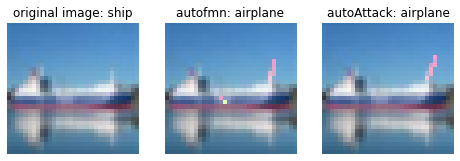

-----------------------------------------------------
FMN norm: 4.6502485275268555
AA norm:  4.0


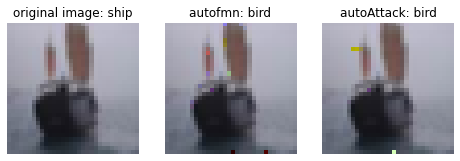

-----------------------------------------------------
FMN norm: 4.677881717681885
AA norm:  4.0


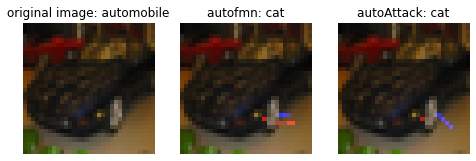

-----------------------------------------------------
FMN norm: 4.926356315612793
AA norm:  4.0


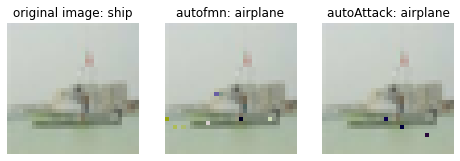

-----------------------------------------------------
FMN norm: 8.006401062011719
AA norm:  8.0


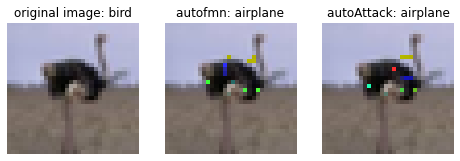

-----------------------------------------------------
FMN norm: 8.01933479309082
AA norm:  8.0


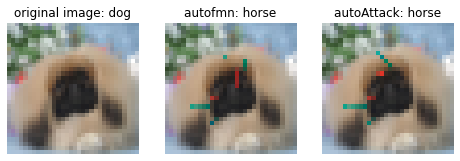

-----------------------------------------------------
FMN norm: 8.026924133300781
AA norm:  8.0


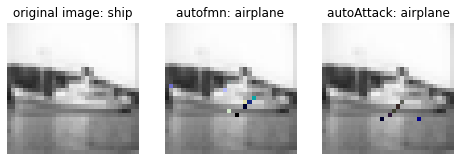

-----------------------------------------------------
FMN norm: 8.08992862701416
AA norm:  8.0


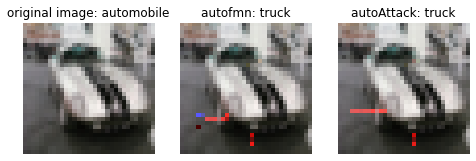

-----------------------------------------------------
FMN norm: 8.210188865661621
AA norm:  8.0


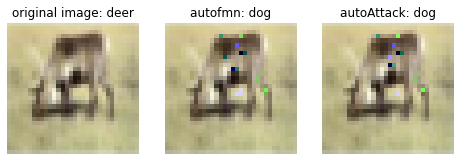

-----------------------------------------------------
FMN norm: 8.232797622680664
AA norm:  8.0


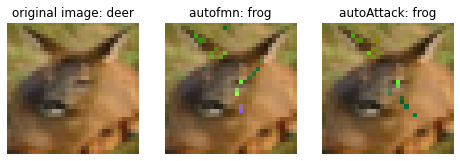

-----------------------------------------------------
FMN norm: 8.2590970993042
AA norm:  8.0


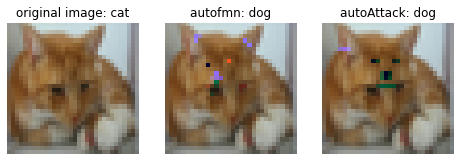

-----------------------------------------------------
FMN norm: 8.268381118774414
AA norm:  8.0


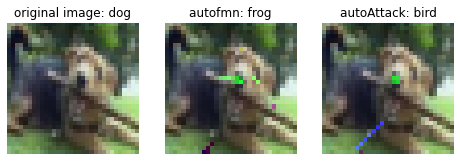

-----------------------------------------------------
FMN norm: 8.285736083984375
AA norm:  8.0


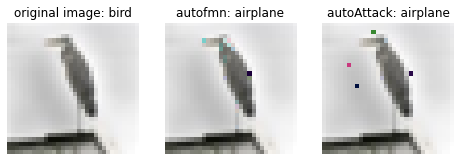

-----------------------------------------------------
FMN norm: 8.337139129638672
AA norm:  8.0


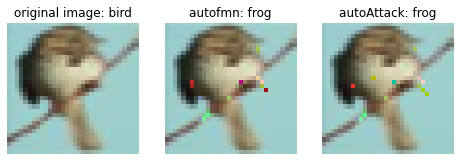

-----------------------------------------------------
FMN norm: 8.352932929992676
AA norm:  8.0


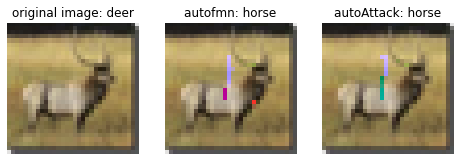

-----------------------------------------------------
FMN norm: 8.405732154846191
AA norm:  8.0


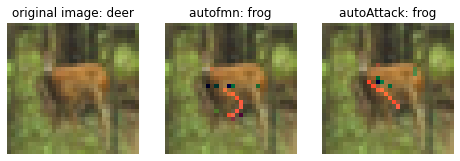

-----------------------------------------------------
FMN norm: 8.49697494506836
AA norm:  8.0


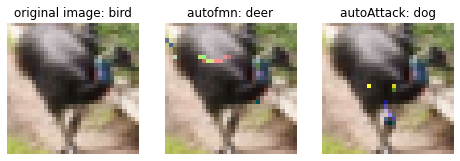

-----------------------------------------------------
FMN norm: 8.55014705657959
AA norm:  8.0


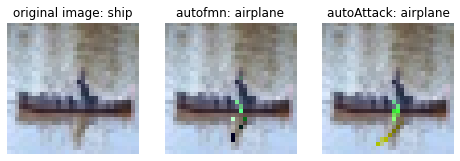

-----------------------------------------------------
FMN norm: 8.691241264343262
AA norm:  8.0


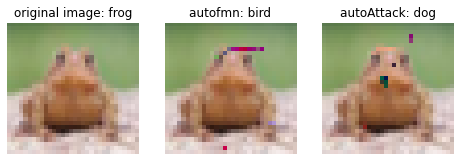

-----------------------------------------------------
FMN norm: 8.695320129394531
AA norm:  8.0


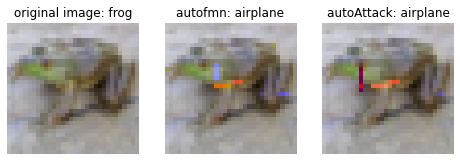

-----------------------------------------------------
FMN norm: 8.712432861328125
AA norm:  8.0


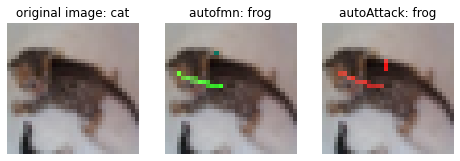

-----------------------------------------------------
FMN norm: 8.844282150268555
AA norm:  8.0


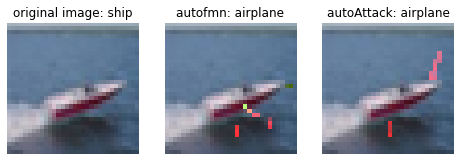

-----------------------------------------------------
FMN norm: 8.978790283203125
AA norm:  8.0


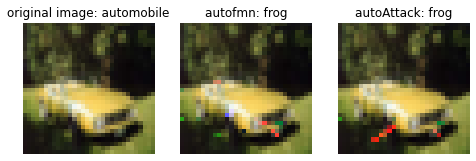

-----------------------------------------------------
FMN norm: 9.113601684570312
AA norm:  8.0


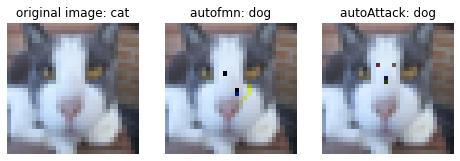

-----------------------------------------------------
FMN norm: 9.115588188171387
AA norm:  8.0


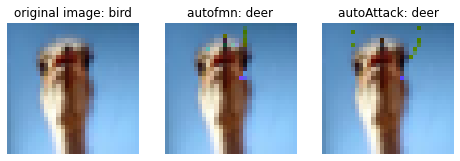

-----------------------------------------------------
FMN norm: 9.186708450317383
AA norm:  8.0


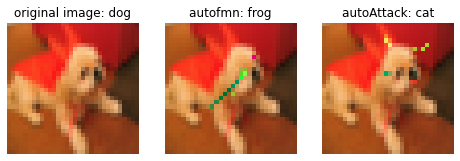

-----------------------------------------------------
FMN norm: 9.23204517364502
AA norm:  8.0


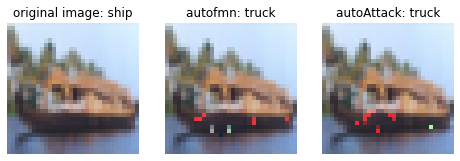

-----------------------------------------------------
FMN norm: 9.447446823120117
AA norm:  8.0


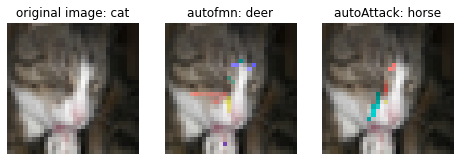

-----------------------------------------------------
FMN norm: 9.472291946411133
AA norm:  8.0


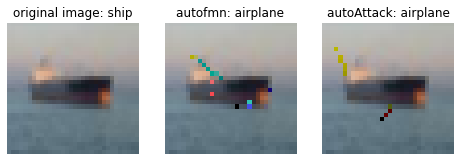

-----------------------------------------------------
FMN norm: 10.101460456848145
AA norm:  8.0


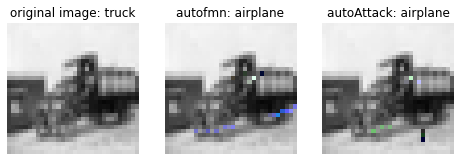

-----------------------------------------------------
FMN norm: 10.187541007995605
AA norm:  8.0


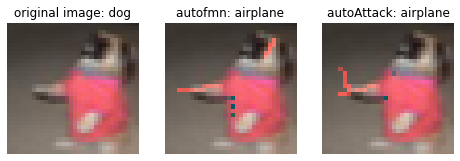

-----------------------------------------------------
FMN norm: 11.179536819458008
AA norm:  8.0


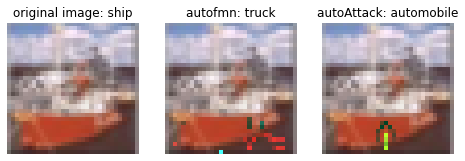

-----------------------------------------------------
FMN norm: 11.282796859741211
AA norm:  8.0


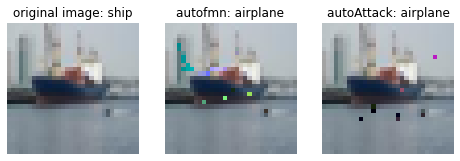

-----------------------------------------------------
FMN norm: 12.100191116333008
AA norm:  12.0


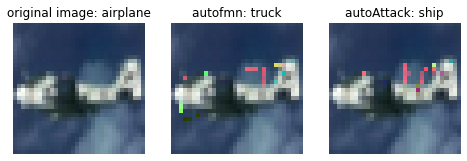

-----------------------------------------------------
FMN norm: 12.122961044311523
AA norm:  12.0


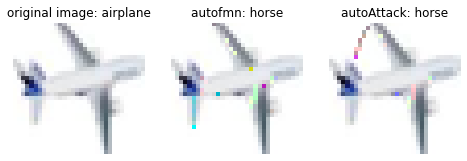

-----------------------------------------------------
FMN norm: 12.187300682067871
AA norm:  12.0


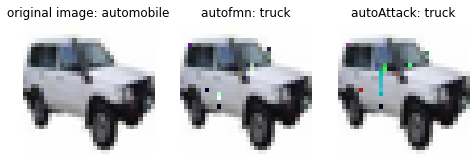

-----------------------------------------------------
FMN norm: 12.236845016479492
AA norm:  12.0


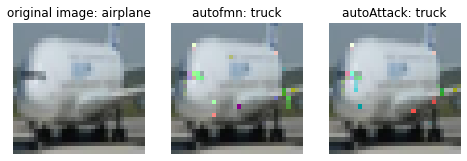

-----------------------------------------------------
FMN norm: 12.239704132080078
AA norm:  12.0


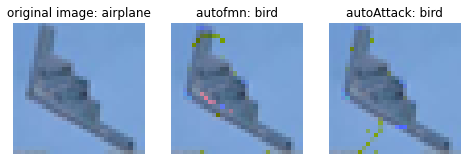

-----------------------------------------------------
FMN norm: 12.245037078857422
AA norm:  12.0


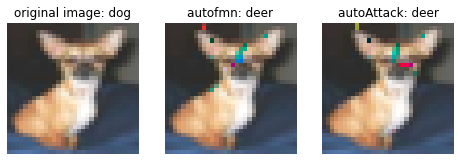

-----------------------------------------------------
FMN norm: 12.382423400878906
AA norm:  12.0


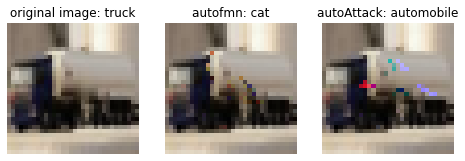

-----------------------------------------------------
FMN norm: 12.384904861450195
AA norm:  8.0


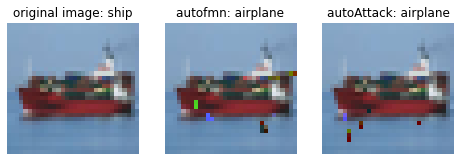

-----------------------------------------------------
FMN norm: 12.42852783203125
AA norm:  12.0


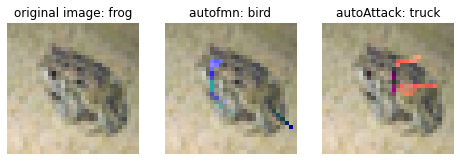

-----------------------------------------------------
FMN norm: 12.460197448730469
AA norm:  12.0


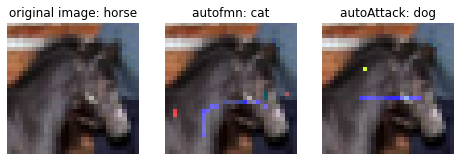

-----------------------------------------------------
FMN norm: 12.461141586303711
AA norm:  12.0


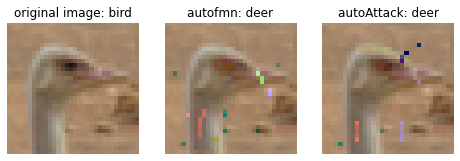

-----------------------------------------------------
FMN norm: 12.495828628540039
AA norm:  12.0


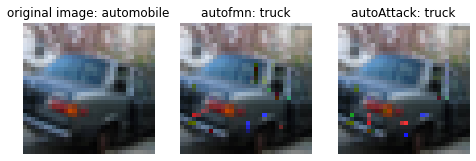

-----------------------------------------------------
FMN norm: 12.54177188873291
AA norm:  12.0


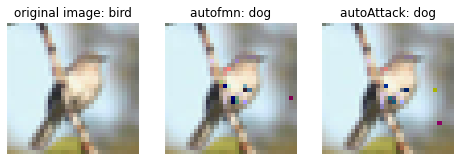

-----------------------------------------------------
FMN norm: 12.595206260681152
AA norm:  12.0


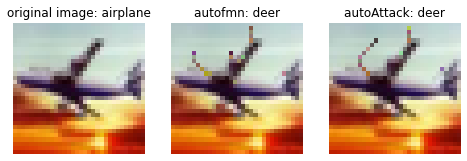

-----------------------------------------------------
FMN norm: 12.700690269470215
AA norm:  12.0


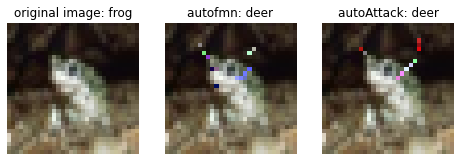

-----------------------------------------------------
FMN norm: 12.744206428527832
AA norm:  12.0


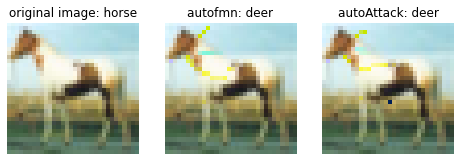

-----------------------------------------------------
FMN norm: 12.792158126831055
AA norm:  12.0


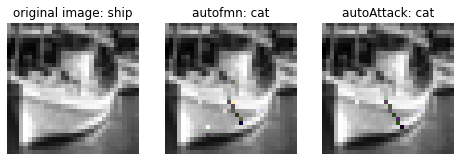

-----------------------------------------------------
FMN norm: 12.824041366577148
AA norm:  12.0


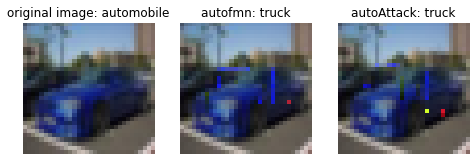

-----------------------------------------------------
FMN norm: 12.843684196472168
AA norm:  12.0


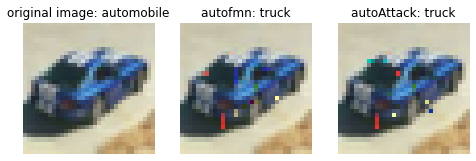

-----------------------------------------------------
FMN norm: 12.86550521850586
AA norm:  12.0


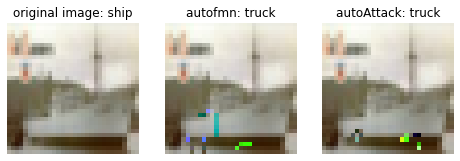

-----------------------------------------------------
FMN norm: 13.055343627929688
AA norm:  12.0


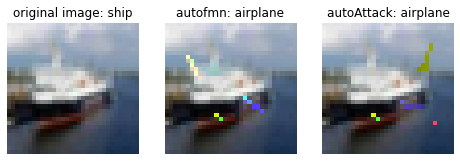

-----------------------------------------------------
FMN norm: 13.085439682006836
AA norm:  12.0


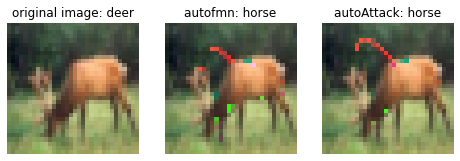

-----------------------------------------------------
FMN norm: 13.145875930786133
AA norm:  12.0


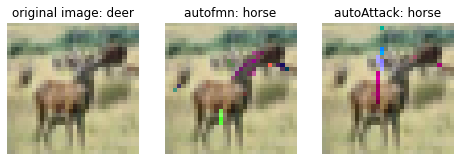

-----------------------------------------------------
FMN norm: 13.610062599182129
AA norm:  12.0


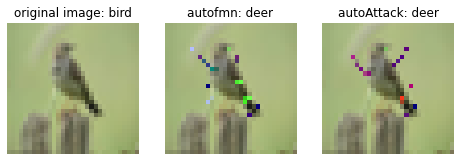

-----------------------------------------------------
FMN norm: 13.84941577911377
AA norm:  12.0


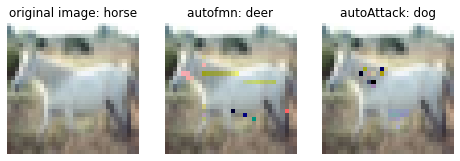

-----------------------------------------------------
FMN norm: 13.894075393676758
AA norm:  12.0


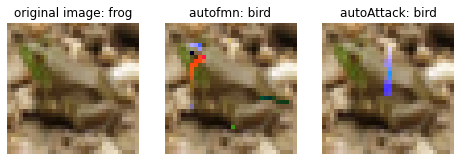

-----------------------------------------------------
FMN norm: 14.601444244384766
AA norm:  12.0


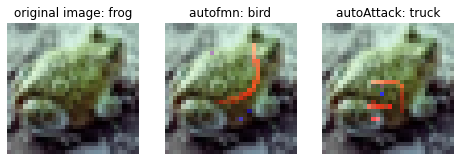

-----------------------------------------------------
FMN norm: 14.664691925048828
AA norm:  12.0


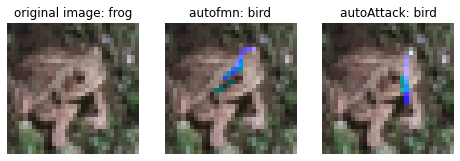

-----------------------------------------------------
FMN norm: 14.858768463134766
AA norm:  12.0


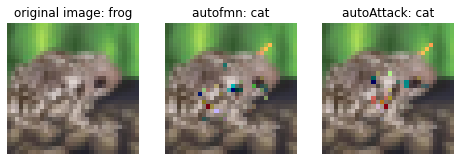

-----------------------------------------------------
FMN norm: 15.173337936401367
AA norm:  12.0


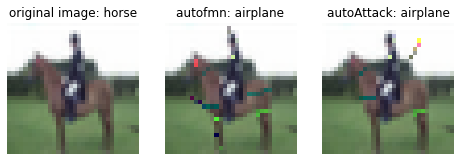

-----------------------------------------------------
FMN norm: 15.320884704589844
AA norm:  12.0


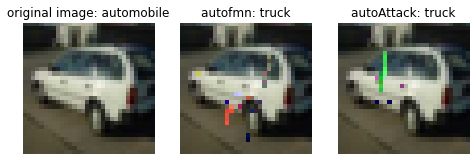

-----------------------------------------------------
FMN norm: 15.347463607788086
AA norm:  12.0


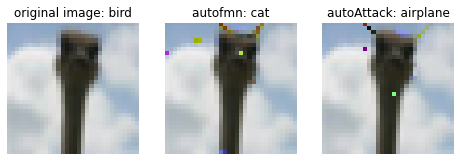

-----------------------------------------------------
FMN norm: 15.496475219726562
AA norm:  12.0


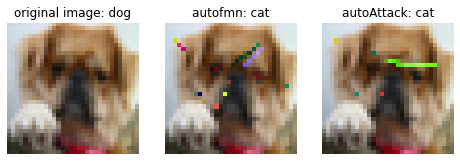

-----------------------------------------------------
FMN norm: 15.744744300842285
AA norm:  15.2


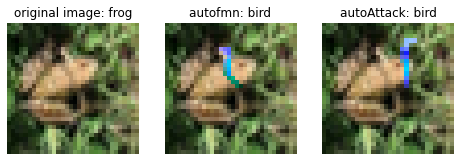

-----------------------------------------------------
FMN norm: 16.02837371826172
AA norm:  16.0


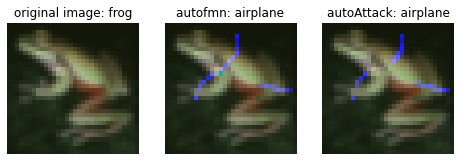

-----------------------------------------------------
FMN norm: 16.131017684936523
AA norm:  16.0


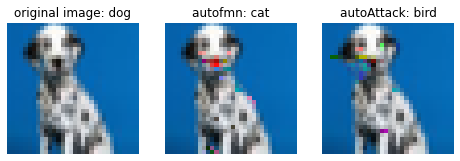

-----------------------------------------------------
FMN norm: 16.184114456176758
AA norm:  16.0


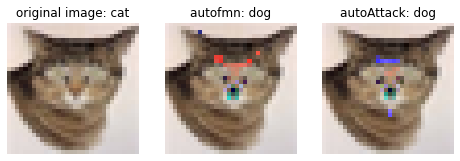

-----------------------------------------------------
FMN norm: 16.396770477294922
AA norm:  16.0


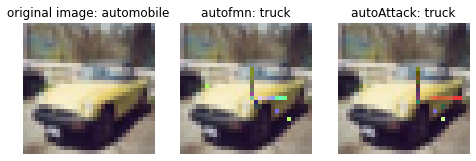

-----------------------------------------------------
FMN norm: 16.417314529418945
AA norm:  12.0


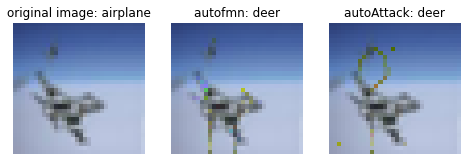

-----------------------------------------------------
FMN norm: 16.673240661621094
AA norm:  16.0


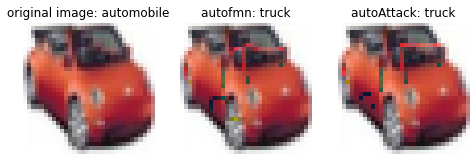

-----------------------------------------------------
FMN norm: 16.679738998413086
AA norm:  12.0


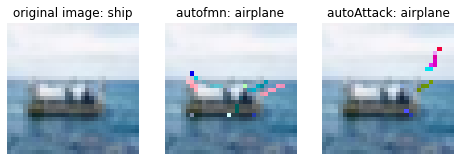

-----------------------------------------------------
FMN norm: 16.8375244140625
AA norm:  16.0


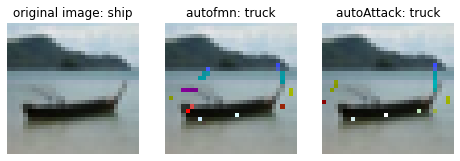

-----------------------------------------------------
FMN norm: 16.955015182495117
AA norm:  16.0


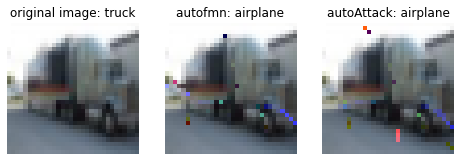

-----------------------------------------------------
FMN norm: 17.1002140045166
AA norm:  12.0


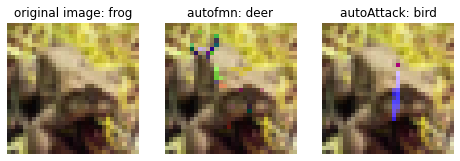

-----------------------------------------------------
FMN norm: 17.103389739990234
AA norm:  16.0


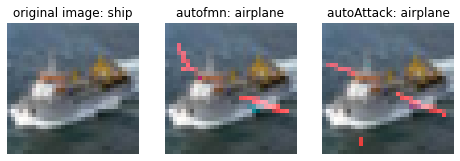

-----------------------------------------------------
FMN norm: 17.150413513183594
AA norm:  16.0


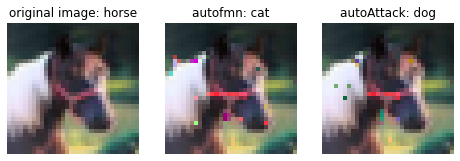

-----------------------------------------------------
FMN norm: 17.428150177001953
AA norm:  12.0


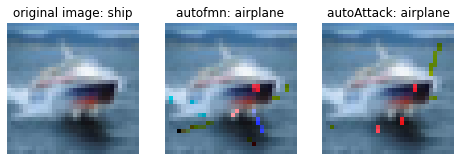

-----------------------------------------------------
FMN norm: 17.503482818603516
AA norm:  16.0


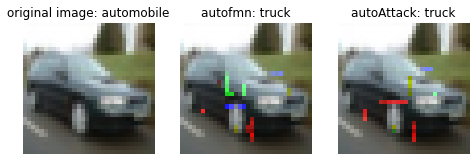

-----------------------------------------------------
FMN norm: 17.61547088623047
AA norm:  16.0


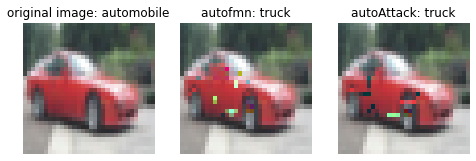

-----------------------------------------------------
FMN norm: 17.621784210205078
AA norm:  16.0


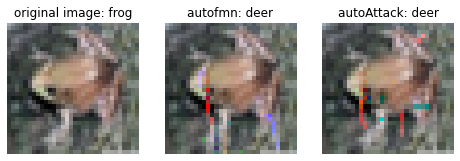

-----------------------------------------------------
FMN norm: 17.684907913208008
AA norm:  16.0


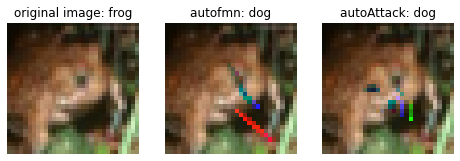

-----------------------------------------------------
FMN norm: 17.816871643066406
AA norm:  16.0


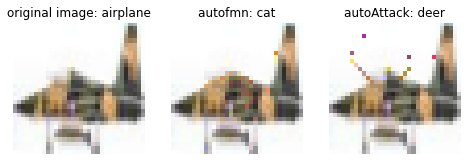

-----------------------------------------------------
FMN norm: 17.940677642822266
AA norm:  16.0


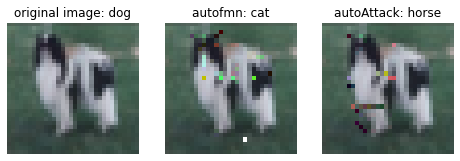

-----------------------------------------------------
FMN norm: 17.949935913085938
AA norm:  16.0


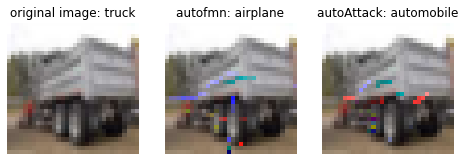

-----------------------------------------------------
FMN norm: 17.953407287597656
AA norm:  16.0


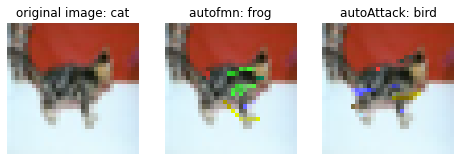

-----------------------------------------------------
FMN norm: 18.44481086730957
AA norm:  12.0


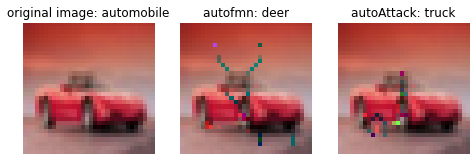

-----------------------------------------------------
FMN norm: 18.520118713378906
AA norm:  16.0


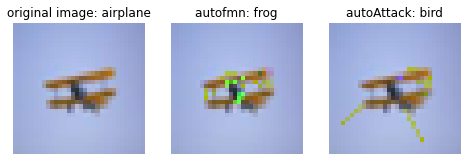

-----------------------------------------------------
FMN norm: 18.884151458740234
AA norm:  12.0


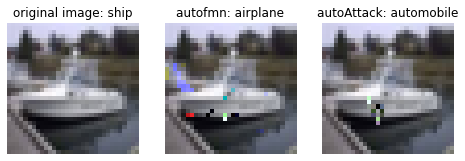

-----------------------------------------------------
FMN norm: 19.29730796813965
AA norm:  16.0


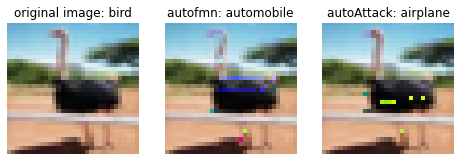

-----------------------------------------------------
FMN norm: 19.546199798583984
AA norm:  16.0


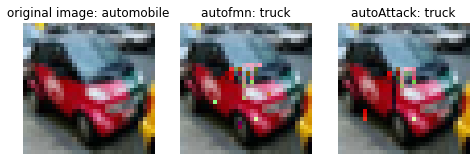

-----------------------------------------------------
FMN norm: 19.847145080566406
AA norm:  16.0


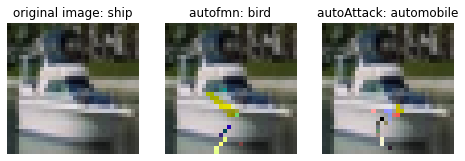

-----------------------------------------------------
FMN norm: 20.02950668334961
AA norm:  20.0


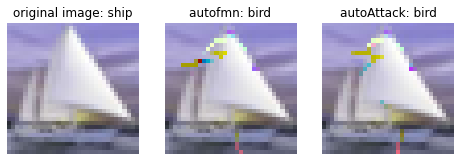

-----------------------------------------------------
FMN norm: 20.108352661132812
AA norm:  20.0


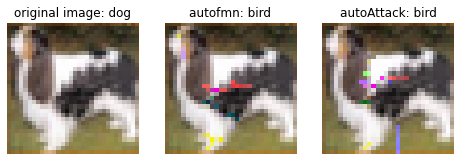

-----------------------------------------------------
FMN norm: 20.288394927978516
AA norm:  20.0


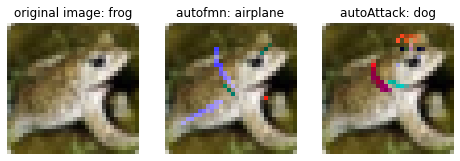

-----------------------------------------------------
FMN norm: 20.355735778808594
AA norm:  20.0


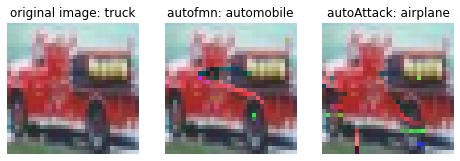

-----------------------------------------------------
FMN norm: 20.381629943847656
AA norm:  16.0


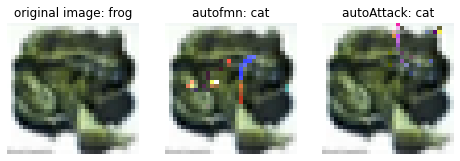

-----------------------------------------------------
FMN norm: 20.391788482666016
AA norm:  20.0


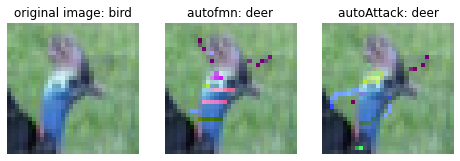

-----------------------------------------------------
FMN norm: 20.480445861816406
AA norm:  16.0


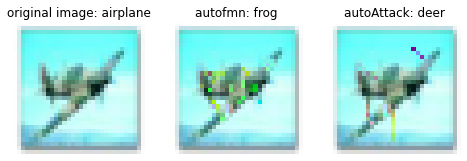

-----------------------------------------------------
FMN norm: 20.482248306274414
AA norm:  20.0


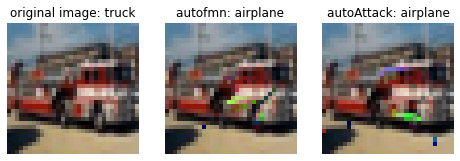

-----------------------------------------------------
FMN norm: 20.585905075073242
AA norm:  20.0


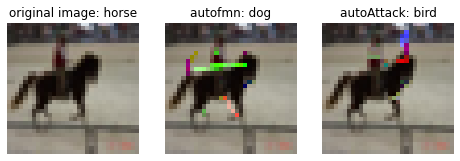

-----------------------------------------------------
FMN norm: 20.58869171142578
AA norm:  16.0


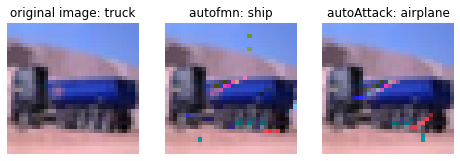

-----------------------------------------------------
FMN norm: 20.736309051513672
AA norm:  12.0


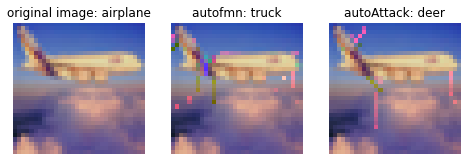

-----------------------------------------------------
FMN norm: 20.8073673248291
AA norm:  16.0


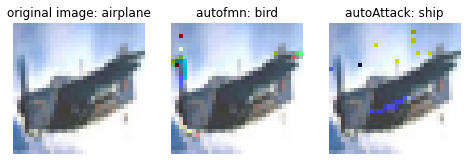

-----------------------------------------------------
FMN norm: 20.968164443969727
AA norm:  20.0


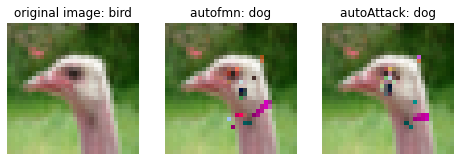

-----------------------------------------------------
FMN norm: 21.28268814086914
AA norm:  18.9


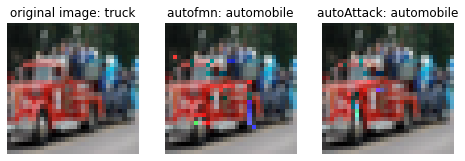

-----------------------------------------------------
FMN norm: 21.313180923461914
AA norm:  20.0


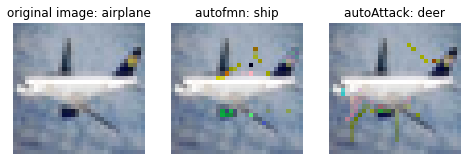

-----------------------------------------------------
FMN norm: 21.37935447692871
AA norm:  20.0


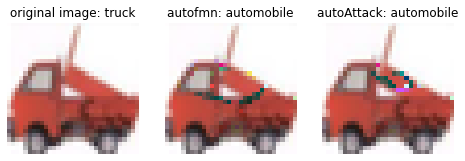

-----------------------------------------------------
FMN norm: 21.548492431640625
AA norm:  20.0


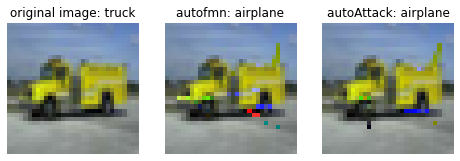

-----------------------------------------------------
FMN norm: 21.678613662719727
AA norm:  20.0


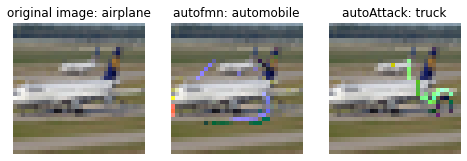

-----------------------------------------------------
FMN norm: 22.022796630859375
AA norm:  20.0


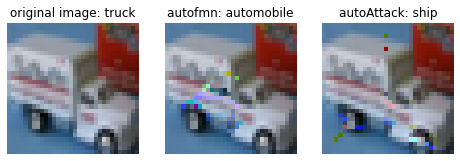

-----------------------------------------------------
FMN norm: 22.103025436401367
AA norm:  20.0


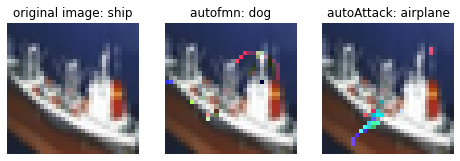

-----------------------------------------------------
FMN norm: 22.657743453979492
AA norm:  20.0


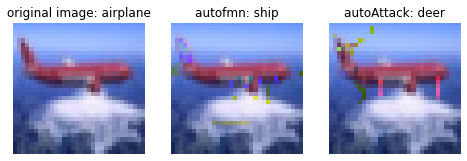

-----------------------------------------------------
FMN norm: 23.301223754882812
AA norm:  16.0


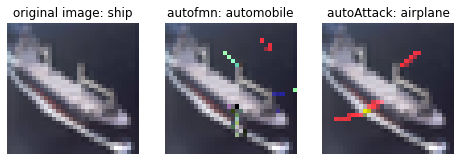

-----------------------------------------------------
FMN norm: 24.311222076416016
AA norm:  20.0


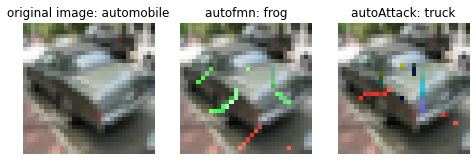

-----------------------------------------------------
FMN norm: 24.559173583984375
AA norm:  20.0


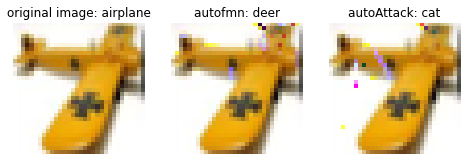

-----------------------------------------------------
FMN norm: 24.997093200683594
AA norm:  20.0


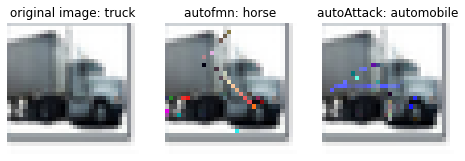

-----------------------------------------------------
FMN norm: 25.46098518371582
AA norm:  20.0


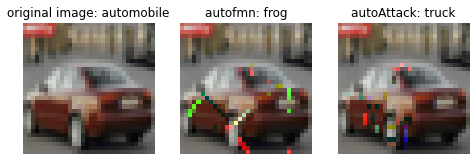

-----------------------------------------------------
FMN norm: 26.563091278076172
AA norm:  20.0


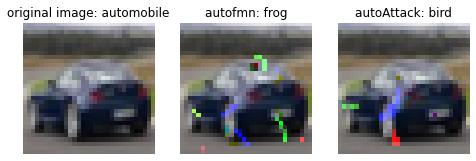

-----------------------------------------------------
FMN norm: 27.45427703857422
AA norm:  20.0


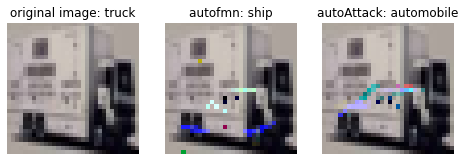

-----------------------------------------------------
FMN norm: 30.346174240112305
AA norm:  30.0


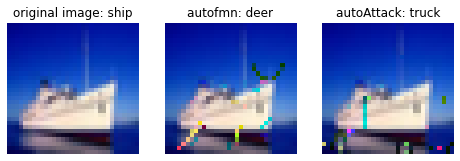

-----------------------------------------------------
FMN norm: 30.37257957458496
AA norm:  30.0


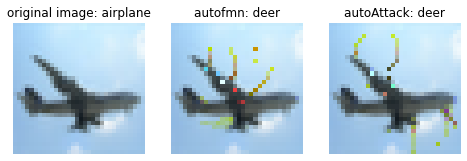

-----------------------------------------------------
FMN norm: 30.391984939575195
AA norm:  30.0


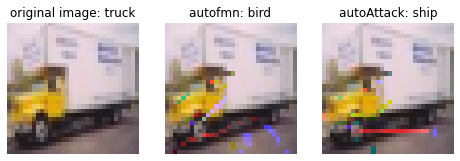

-----------------------------------------------------
FMN norm: 30.72195816040039
AA norm:  30.0


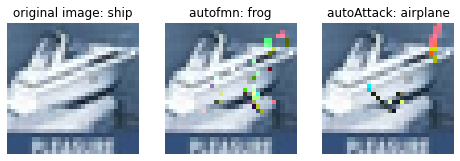

-----------------------------------------------------
FMN norm: 30.872638702392578
AA norm:  30.0


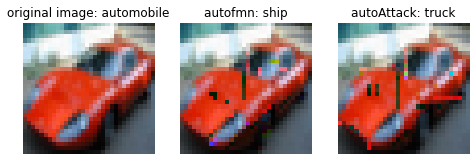

-----------------------------------------------------
FMN norm: 31.00531768798828
AA norm:  30.0


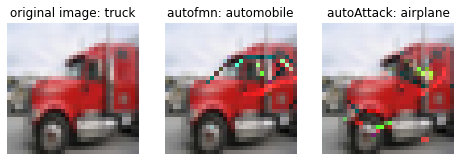

-----------------------------------------------------
FMN norm: 31.114059448242188
AA norm:  30.0


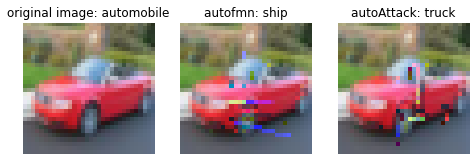

-----------------------------------------------------
FMN norm: 31.42637825012207
AA norm:  30.0


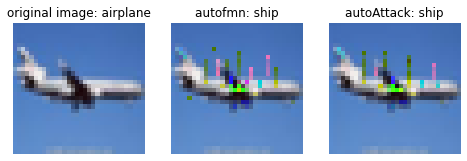

-----------------------------------------------------
FMN norm: 32.37750244140625
AA norm:  30.0


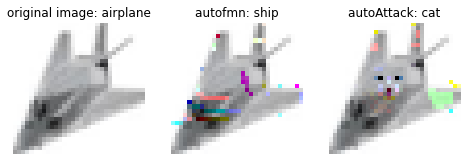

-----------------------------------------------------
FMN norm: 34.44535827636719
AA norm:  30.0


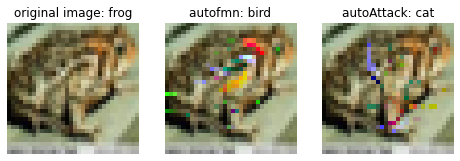

-----------------------------------------------------
FMN norm: 37.43775939941406
AA norm:  30.0


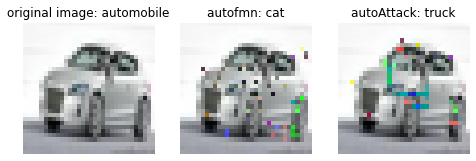

-----------------------------------------------------
FMN norm: 37.645164489746094
AA norm:  30.0


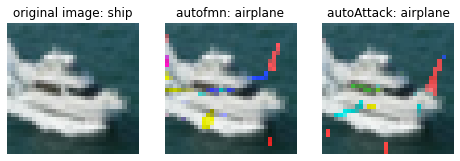

-----------------------------------------------------
FMN norm: 38.21120834350586
AA norm:  30.0


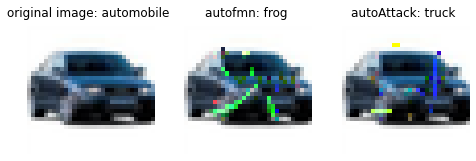

-----------------------------------------------------
FMN norm: 44.447975158691406
AA norm:  30.0


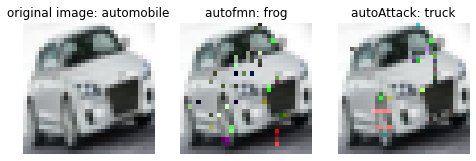

-----------------------------------------------------


In [19]:
for l in sorted_l:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,6))
    
    img0 = clean[l].swapaxes(0,2).swapaxes(0,1)
    ax1.imshow(img0)
    ax1.set_title(f"original image: {classes[clean_y[l]]}")
    
    img1 = dic_fmn[key_fmn]["results"][l].swapaxes(0,2).swapaxes(0,1)#.swapaxes(1,2)
    ax2.imshow(img1)
    ax2.set_title(f"autofmn: {classes[dic_fmn[key_fmn]['class'][l]]}")

    img2 = dic_aa[key_aa]["results"][l].swapaxes(0,2).swapaxes(0,1)#.swapaxes(1,2)
    ax3.imshow(img2)
    ax3.set_title(f"autoAttack: {classes[dic_aa[key_aa]['class'][l]]}")
    
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    
    print(f"FMN norm: {fnorms[l]}"), 
    print(f"AA norm:  {round(dic_aa[key_aa]['norm_progress'][-1, l], 1):.1f}")
    assert np.isclose(np.linalg.norm((img1-img0.numpy()).ravel(), ord=1), fnorms[l])
    assert np.isclose(dic_aa[key_aa]["norm_progress"][-1, l] , np.linalg.norm((img2-img0.numpy()).ravel(), ord=1))
    plt.show()
    print("-"*53)